<a href="https://colab.research.google.com/github/ShubhiG30/AIMLMonth2023/blob/main/CustomerAdClicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EDA Analysis***

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.kaggle.com/datasets/hiimanshuagarwal/advertising-ef

--2023-07-02 13:26:05--  https://www.kaggle.com/datasets/hiimanshuagarwal/advertising-ef
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘advertising-ef.4’

advertising-ef.4        [ <=>                ]  14.74K  --.-KB/s    in 0.01s   

2023-07-02 13:26:05 (1.18 MB/s) - ‘advertising-ef.4’ saved [15095]



In [ ]:
data = pd.read_csv('advertising_ef.csv')

**TASK1-Are there any missing values in the dataset related to ad data or customer engagement metrics?**


In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
data.isna()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

**How should these missing values be handled?**



1.   Delete the missing value(we usually don't prefer this)


In [ ]:
data.dropna()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,28-01-2016 20:59,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


In [ ]:
data.shape

(1009, 10)

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64




2.   Handle the missing value by filling average constant into it.




In [ ]:
data  = pd.read_csv('advertising_ef.csv')
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

Null values of the columns 'Daily Time Spent on Site' is replaced by taking an average constant of its other available value.


In [ ]:
avgDailyTime = data['Daily Time Spent on Site'].mean()
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].fillna(avgDailyTime)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.300000,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.630000,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.550000,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


In [ ]:
avgDailyTime

65.00946268656716

In [ ]:
data.isna().sum()

Daily Time Spent on Site     0
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

Similarly, Null values of Age,Area and Internet Usage are Handled.

In [ ]:
avgAge=data['Age'].mean()
avgAreaIncome=data['Area Income'].mean()
avgDailyInternetUsage=data['Daily Internet Usage'].mean()
data['Age']=data['Age'].fillna(avgAge)
data['Area Income']=data['Area Income'].fillna(avgAreaIncome)
data['Daily Internet Usage']=data['Daily Internet Usage'].fillna(avgDailyInternetUsage)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.300000,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.630000,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.550000,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


In [ ]:
data.isna().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**TASK 2: Are there any duplicate entries in the dataset that need to be identified and removed?**

In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Gender, Country, Timestamp, Clicked on Ad]
Index: []


Empty DataFrame implies that there are no duplicate rows in the dataset.

**TASK 3: What is the distribution of different demographic variables in the dataset (e.g., age, gender, country)?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

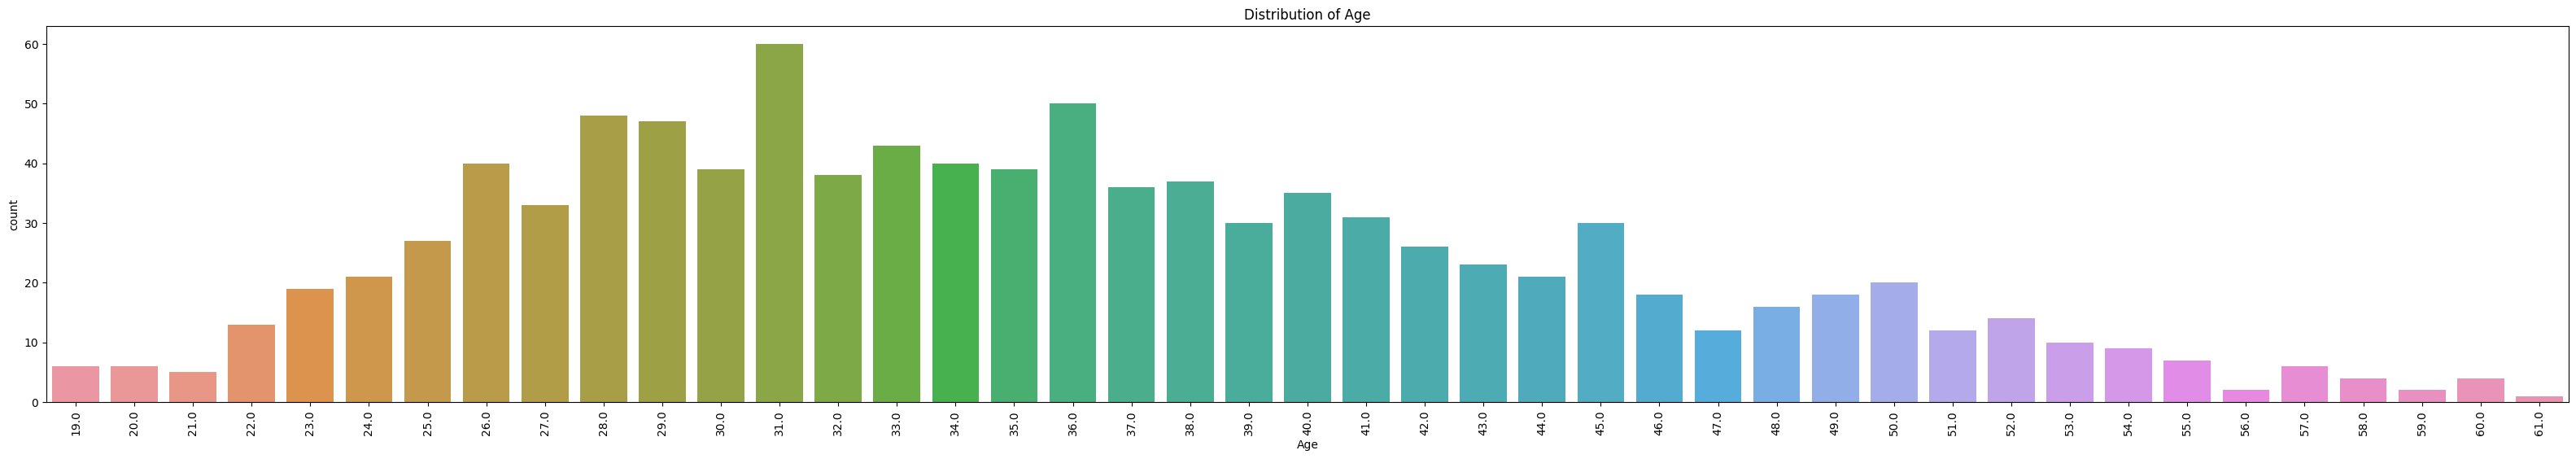

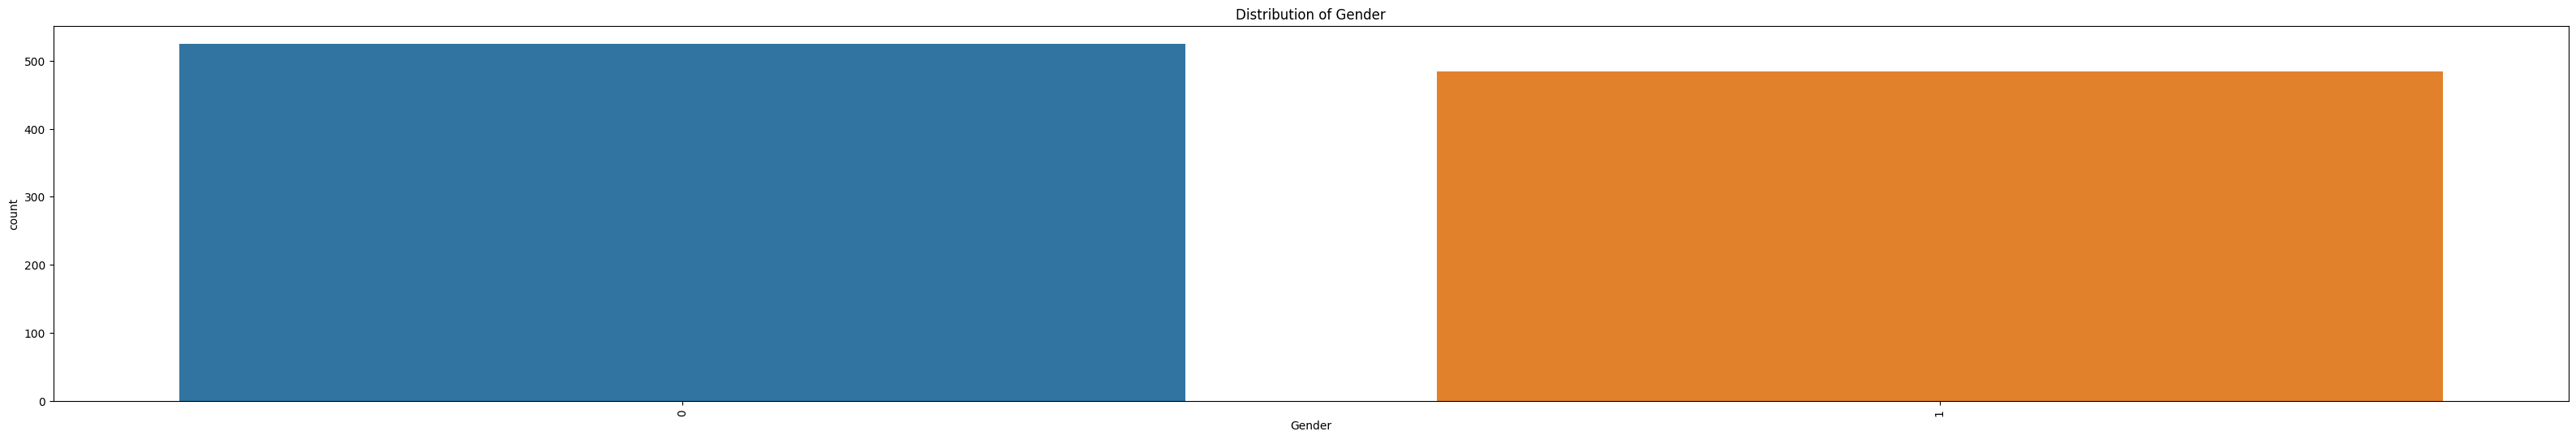

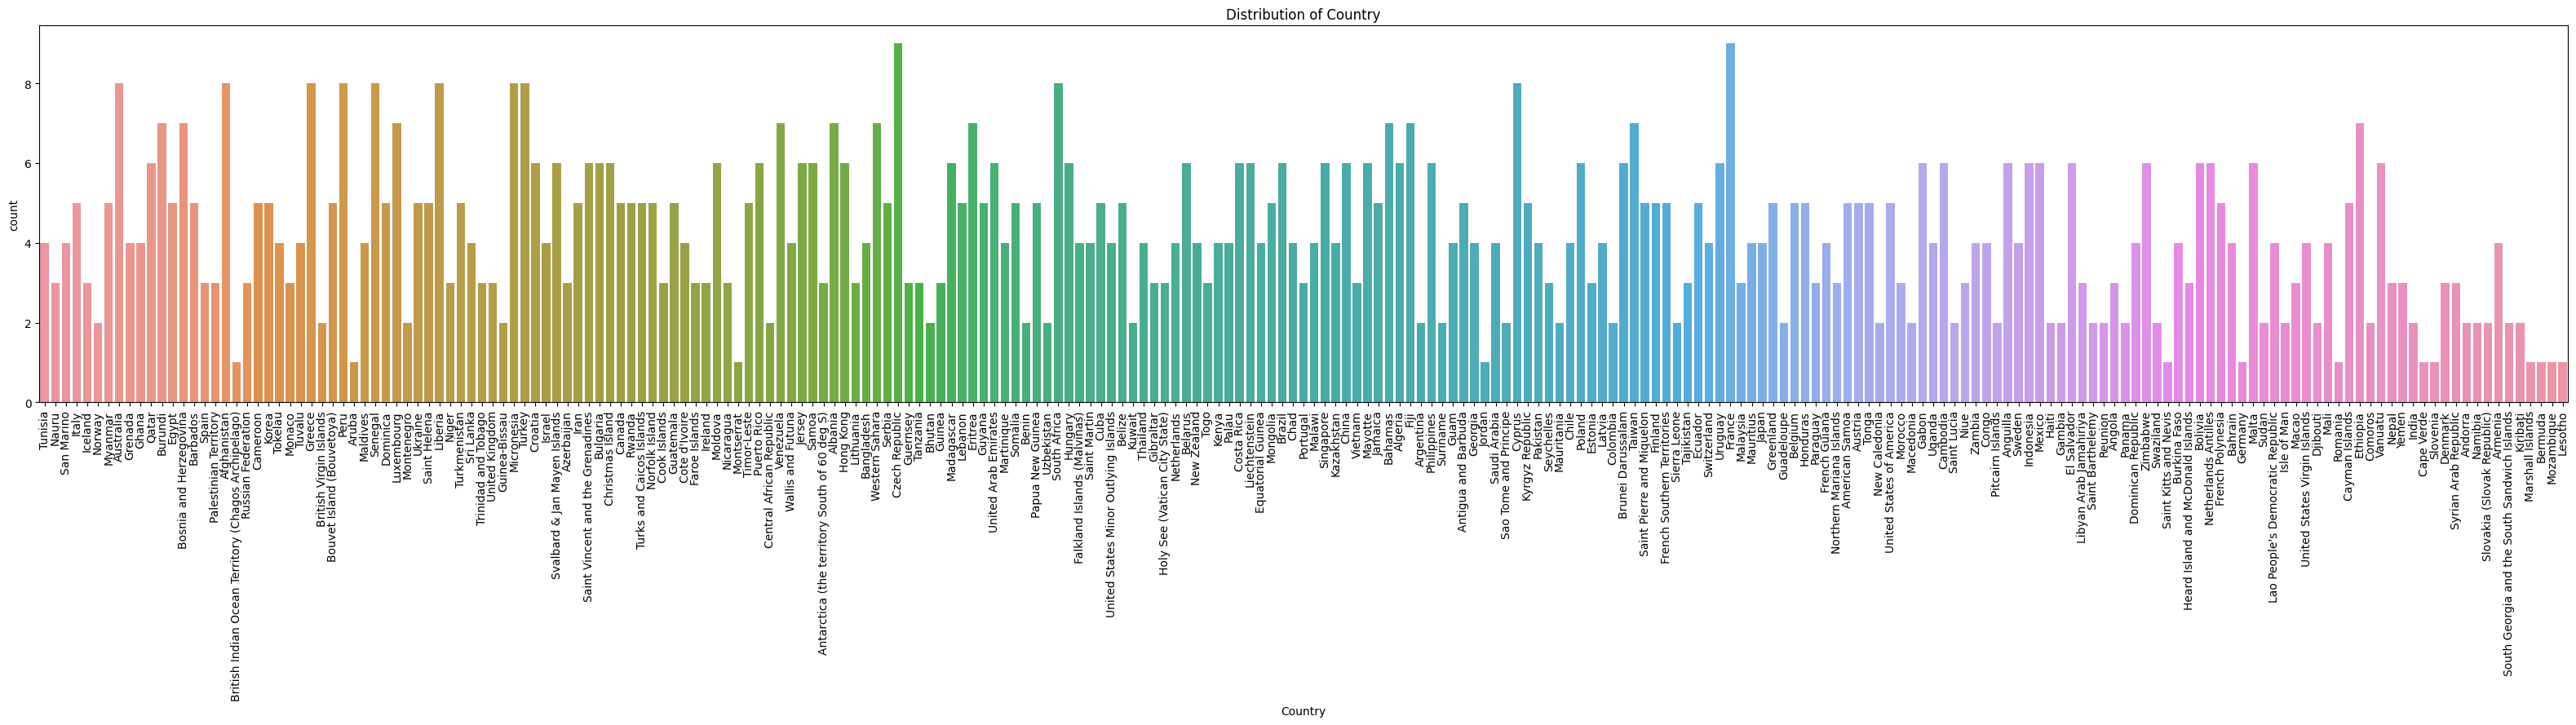

In [ ]:
demographic_cols = ["Age", "Gender", "Country"]
for col in demographic_cols:
    plt.figure(figsize=(40, 6))
    sns.countplot(data = data, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

Text(0.5, 0, 'Country\t')

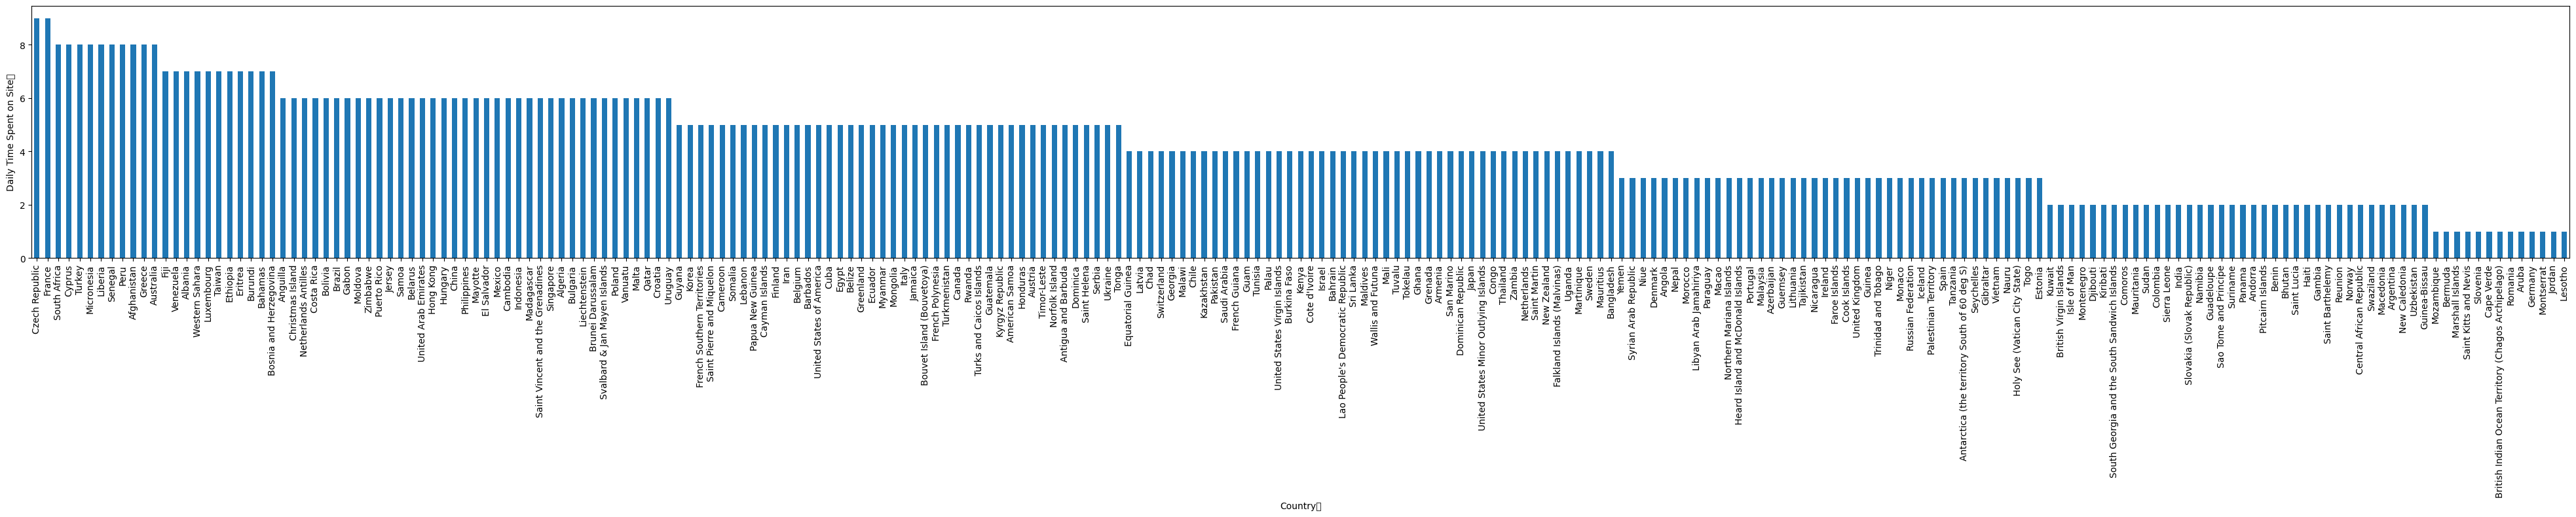

In [ ]:
data.Country.value_counts().plot(kind = 'bar', figsize = (50,5))

plt.ylabel('Daily Time Spent on Site	')
plt.xlabel('Country	')

Czech Republic has the highest count.

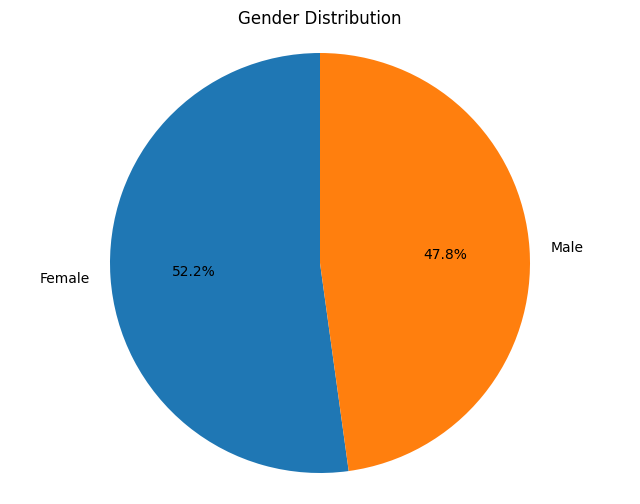

In [ ]:
gender_counts = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Text(0.5, 0, 'Gender')

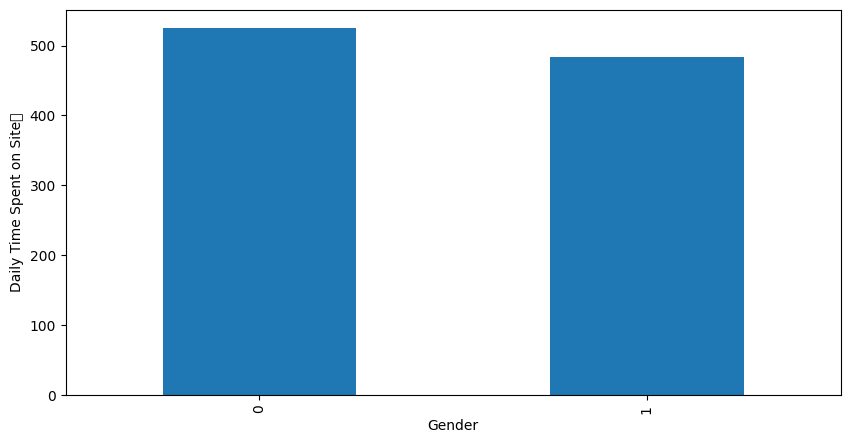

In [ ]:
data.Gender.value_counts().plot(kind = 'bar', figsize = (10,5))

plt.ylabel('Daily Time Spent on Site	')
plt.xlabel('Gender')

52.2% of consumers are Female and 47.8% are Male.

**TASK 4: How are the numerical variables (e.g., "Daily Time Spent on Site," "Age," "Area Income") distributed? Are there any outliers?**

<Axes: xlabel='Daily Time Spent on Site'>

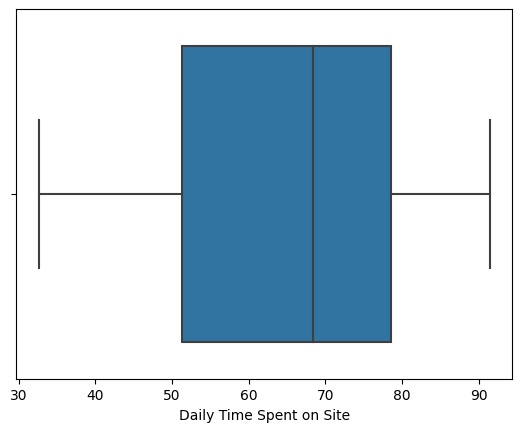

In [ ]:
sns.boxplot(x = data['Daily Time Spent on Site'])

<Axes: xlabel='Age'>

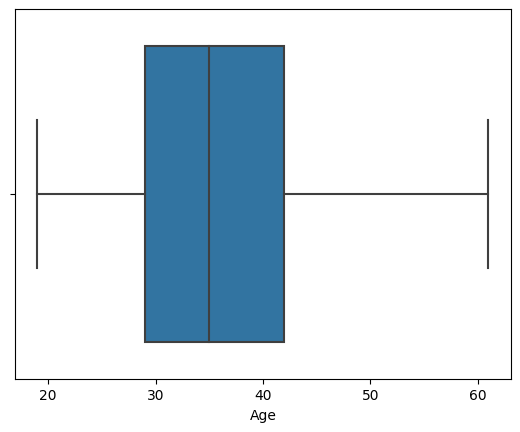

In [ ]:
sns.boxplot(x = data['Age'])

<Axes: xlabel='Area Income'>

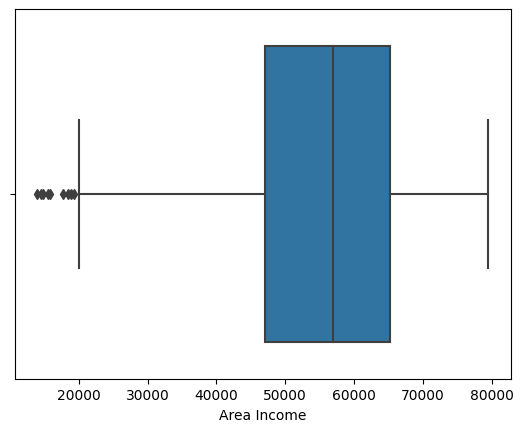

In [ ]:
sns.boxplot(x = data['Area Income'])

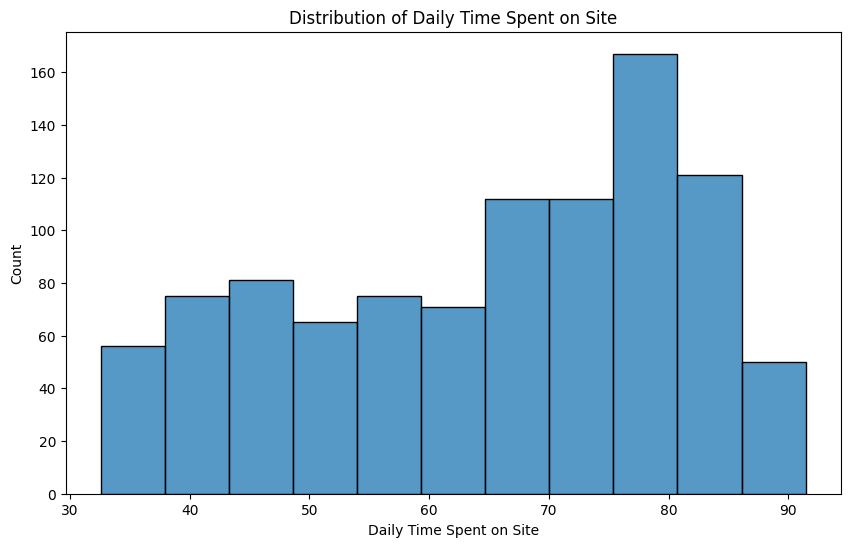

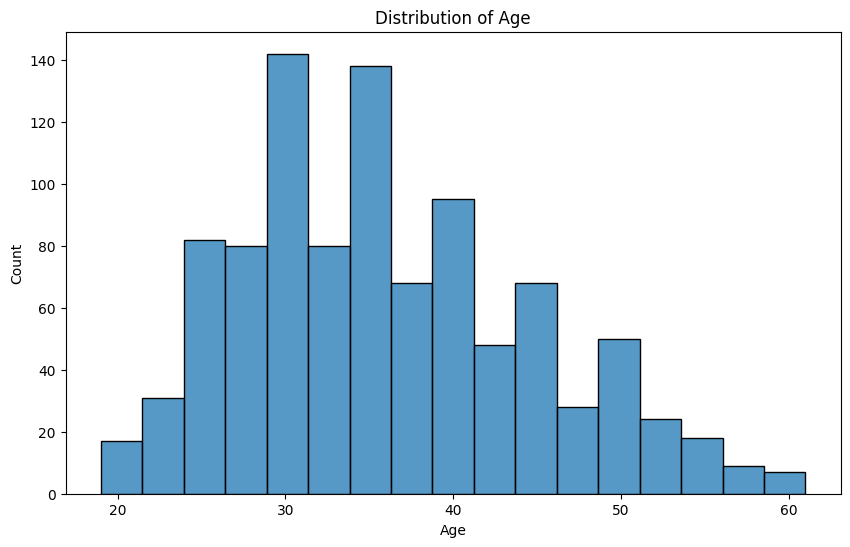

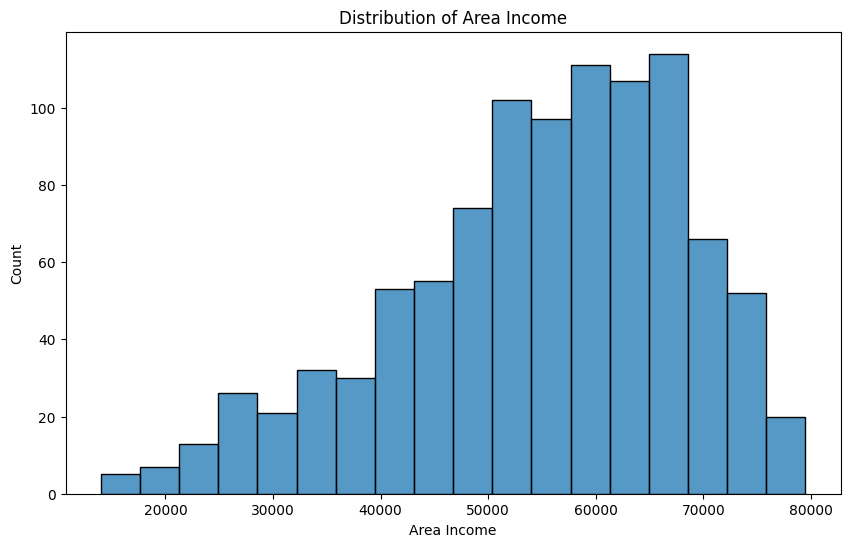

In [ ]:
numerical_cols = ["Daily Time Spent on Site", "Age", "Area Income"]
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data= data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()



*   Daily Time Spent on Site: 70-80
*   Age: 30-40
*   Area Income:50000-70000



**TASK 5: How does the average time spent on the website vary for different demographic groups?**

In [ ]:
avg_time_by_demographic = data.groupby("Gender")["Daily Time Spent on Site"].mean()
print(avg_time_by_demographic)

Gender
Female    65.421321
Male      64.437259
Name: Daily Time Spent on Site, dtype: float64


# ***Extension of EDA task - Classification/Regression***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.300000,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.630000,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.550000,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

In [ ]:
X=data.drop(columns=['Clicked on Ad', 'City', 'Ad Topic Line'])
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Month,Hour
0,68.950000,35.0,61833.90,256.09,Female,Tunisia,3,0
1,65.009463,31.0,68441.85,193.77,Male,Nauru,4,1
2,69.470000,26.0,59785.94,236.50,Female,San Marino,3,20
3,74.150000,29.0,54806.18,245.89,Male,Italy,10,2
4,68.370000,35.0,73889.99,225.58,Female,Iceland,3,3


In [ ]:
Y=data['Clicked on Ad']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('advertising_ef.csv')


In [ ]:
 data.pop('Gender')

0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
1004      Male
1005      Male
1006      Male
1007    Female
1008    Female
Name: Gender, Length: 1009, dtype: object

In [ ]:
categorical_cols = ['Gender']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

<Axes: >

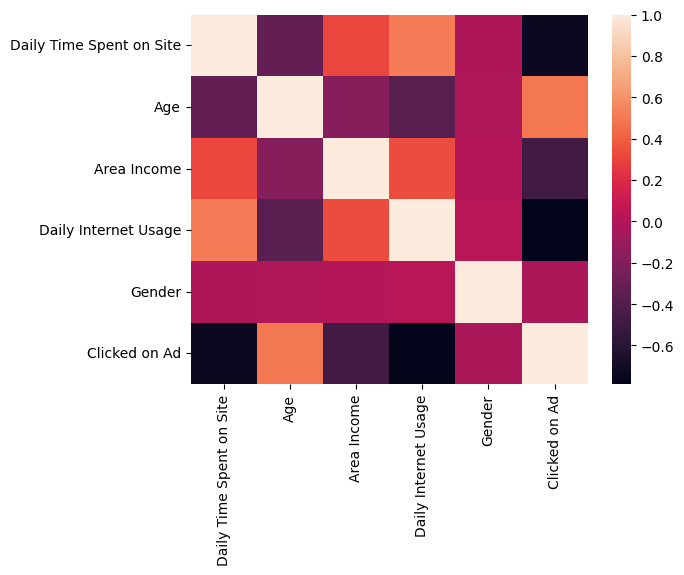

In [ ]:
sns.heatmap(data.corr())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()
X= X.apply(le.fit_transform)

In [ ]:
model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
from sklearn import tree

[Text(0.4532860824742268, 0.9583333333333334, 'x[3] <= 462.5\ngini = 0.5\nsamples = 788\nvalue = [393, 395]'),
 Text(0.211340206185567, 0.875, 'x[0] <= 507.0\ngini = 0.165\nsamples = 387\nvalue = [35, 352]'),
 Text(0.10309278350515463, 0.7916666666666666, 'x[2] <= 962.0\ngini = 0.018\nsamples = 326\nvalue = [3, 323]'),
 Text(0.08247422680412371, 0.7083333333333334, 'x[0] <= 491.0\ngini = 0.012\nsamples = 325\nvalue = [2, 323]'),
 Text(0.041237113402061855, 0.625, 'x[2] <= 898.0\ngini = 0.006\nsamples = 320\nvalue = [1, 319]'),
 Text(0.020618556701030927, 0.5416666666666666, 'gini = 0.0\nsamples = 305\nvalue = [0, 305]'),
 Text(0.061855670103092786, 0.5416666666666666, 'x[2] <= 899.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.041237113402061855, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08247422680412371, 0.4583333333333333, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.12371134020618557, 0.625, 'x[0] <= 494.5\ngini = 0.32\nsamples = 5\

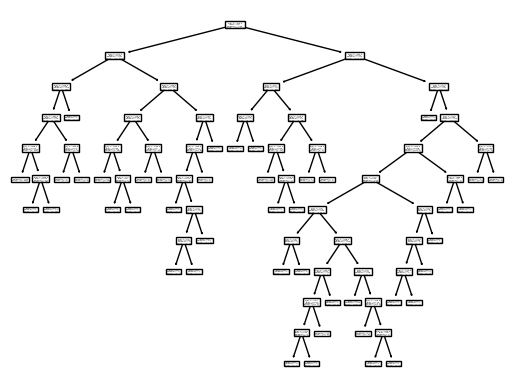

In [ ]:
tree.plot_tree(model)

**Split dataset in train test (80:20 ratio)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train.shape,Y_train.shape


((788,), (788,))

In [ ]:
X_test.shape,Y_test.shape

((197, 8), (197,))

In [ ]:
model.score(X_train,Y_train)

1.0

In [ ]:
model.score(X_test,Y_test)

0.9441624365482234

In [ ]:
y_pred_regression = model.predict(X_test)
print(y_pred_regression)

[0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
#calculate accuracy of the model
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.9441624365482234


**Model Prediction Result: Hence the model works good as it gives the accuracy of 94.41% on the test data**